In [1]:
from matplotlib import pyplot as plt
import numpy as np

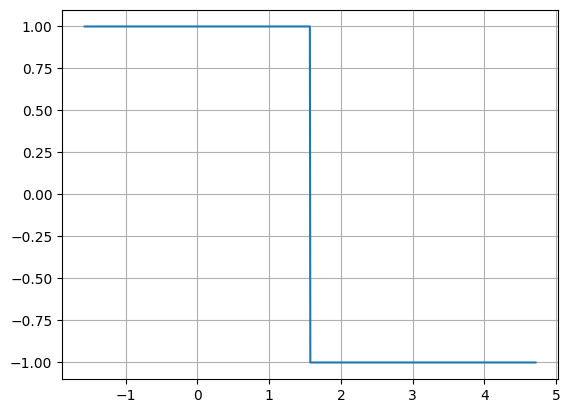

In [2]:
t = np.linspace(-1/2*np.pi, 3/2*np.pi,1000)
def f(t):
    return np.where((t >= -1/2*np.pi) & (t <= 1/2*np.pi),1,-1)

plt.plot(t,f(t))
plt.grid()
plt.show()

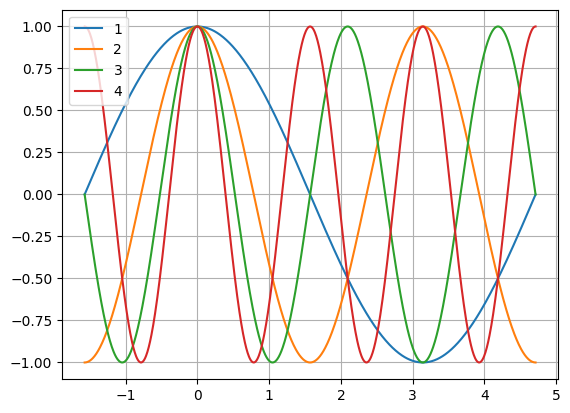

In [3]:
for freq in [1,2,3,4]:
    plt.plot(t,np.cos(freq*t),label=f'{freq}')
plt.grid()
plt.legend()
plt.show()

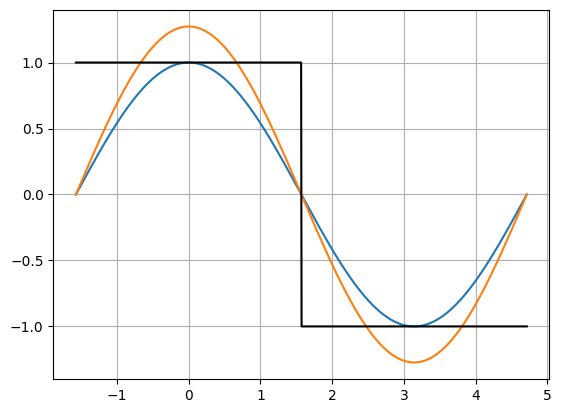

In [4]:
plt.plot(t,np.cos(t))
plt.plot(t,4/np.pi*np.cos(t))
plt.plot(t,f(t),'k')
plt.grid()
plt.show()

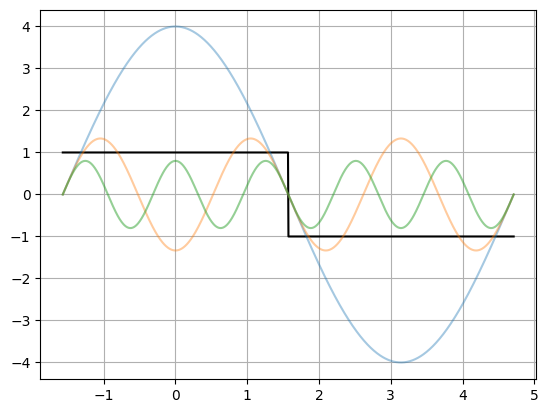

In [24]:
a0 = np.cos(0); a1 = 4/np.pi; a2 = 0; a3 = -4/(3*np.pi); a4 = 0; a5 = 4*1/(5*np.pi)
plt.plot(t,f(t),'k')
plt.plot(t,a1*np.pi*np.cos(t),alpha=0.4)
# plt.plot(t,a2*np.pi*np.cos(2*t),alpha=0.5)
plt.plot(t,a3*np.pi*np.cos(3*t),alpha=0.4)
# plt.plot(t,a4*np.pi*np.cos(4*t),alpha=0.5)
plt.plot(t,a5*np.pi*np.cos(5*t),alpha=0.5)
plt.grid()
plt.show()

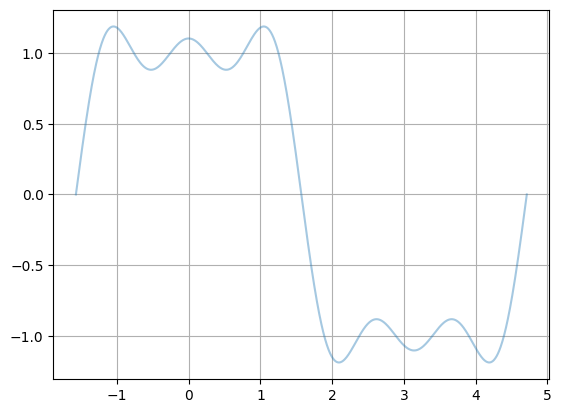

In [6]:
fourier5 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t) + a5*np.cos(5*t)
plt.plot(t,fourier5(t),alpha=0.4)
plt.grid()
plt.show()

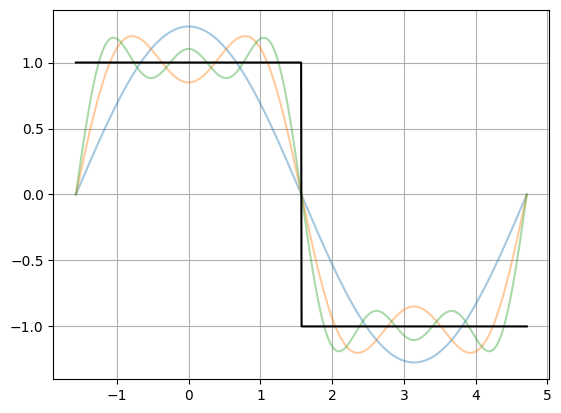

In [7]:
fourier1 = lambda t: a1*np.cos(1*t)
fourier2 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t)
fourier3 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t)
fourier4 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t)
fourier5 = lambda t: a1*np.cos(1*t) + a2*np.cos(2*t) + a3*np.cos(3*t) + a4*np.cos(4*t) + a5*np.cos(5*t)
plt.plot(t,fourier1(t),alpha=0.4)
# plt.plot(t,fourier2(t),alpha=0.4)
plt.plot(t,fourier3(t),alpha=0.4)
# plt.plot(t,fourier4(t),alpha=0.4)
plt.plot(t,fourier5(t),alpha=0.4)
plt.plot(t,f(t),'k')
plt.grid()
plt.show()

In [19]:
from scipy.integrate import quad

# Define the function f(t)
def f(t):
    return np.where((t >= -np.pi/2) & (t <= np.pi/2), 1, -1)

# Function to calculate Fourier coefficients
def calculate_coefficient(n, func):
    integrand = lambda t: func(t) * np.cos(n * t)
    result, _ = quad(integrand, -np.pi/2, np.pi/2)
    return (1/np.pi) * result

nr_coeff = 4
a0 = calculate_coefficient(0, f)
a_n = [calculate_coefficient(n, f) for n in range(1, nr_coeff)]
b_n = [0]  # Since f(t) is an even function, all b_n coefficients are 0

# Display the coefficients
print(f"a0: {a0}")
print(f"a_n: {a_n}")
print(f"b_n: {b_n}")

a0: 1.0
a_n: [0.6366197723675814, 5.551115123125783e-17, -0.2122065907891938]
b_n: [0]


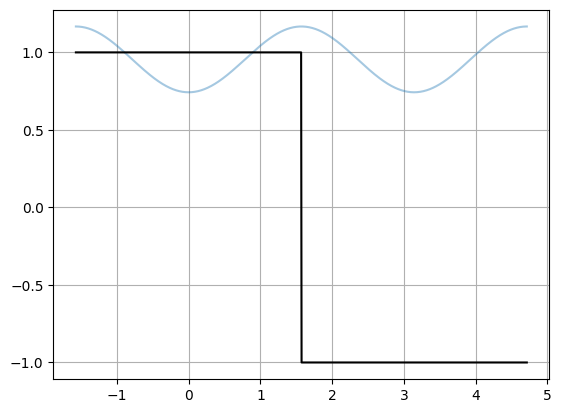

In [26]:
def fourier(t):
    out = a0/np.pi
    for n in range(nr_coeff-1):
        out += a_n[n]*np.cos(n*t)
    return out

plt.plot(t,fourier(t),alpha=0.4)
plt.plot(t,f(t),'k')
plt.grid()
plt.show()

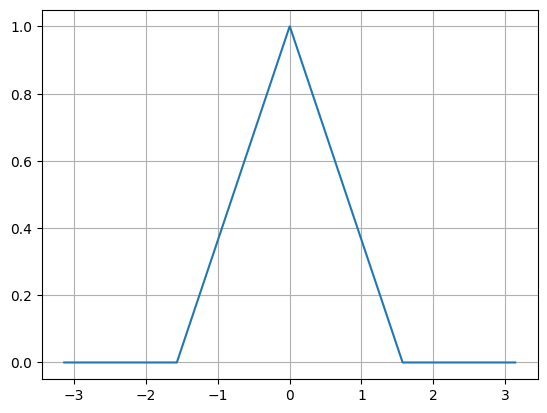

In [44]:
dx = 0.001
L = np.pi
x = L*np.arange(-1+dx,1+dx,dx)
n = len(x)
# divide domain into 4 quarters
nquart = int(np.floor(n/4)) #500 if n = 2000

f = np.zeros_like(x)
# f[0:nquart] = 0
f[nquart:2*nquart] = np.arange(1,nquart+1) * 4/n
f[2*nquart:3*nquart] = np.ones(nquart) - 4/n*np.arange(0,nquart)
# f[-nquart:] = 0

plt.plot(x,f)
plt.grid()
plt.show()

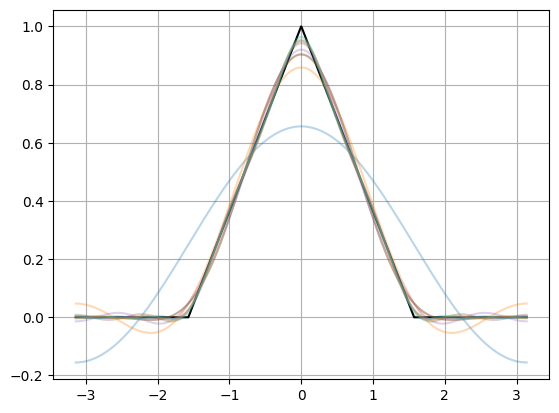

In [79]:
a0 = np.sum(f * np.ones_like(x))*dx
fourier = a0/2

nr_terms = 20
a = np.zeros(nr_terms)
b = np.zeros(nr_terms)
plt.plot(x,f,'k')
for k in range(nr_terms):
    a[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L))*dx #inner product
    b[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L))*dx
    fourier = fourier + a[k]*np.cos((k+1)*np.pi*x/L) + b[k]*np.sin((k+1)*np.pi*x/L)
    if k < 10:
        plt.plot(x,fourier,alpha=0.3)
# plt.plot(x,fourier)
plt.grid()
plt.show()

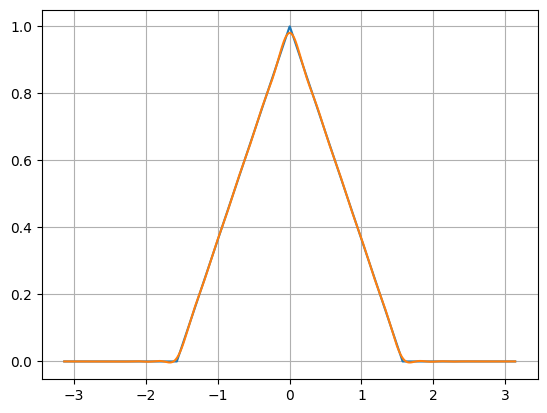

In [80]:
plt.plot(x,f)
plt.plot(x,fourier)
plt.grid()
plt.show()

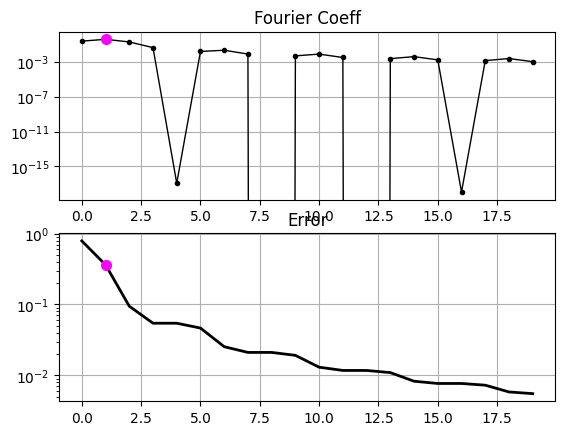

In [109]:
# plot amplitudes

fourier = a0/2 * np.ones_like(f)
kmax = 20
a = np.zeros(kmax)
b = np.zeros(kmax)
err = np.zeros(kmax)

a[0] = a0/2
err[0] = np.linalg.norm(f-fourier)/np.linalg.norm(f)

for k in range(1,kmax):
    a[k] = np.sum(f*np.cos(np.pi*k*x/L))*dx
    b[k] = np.sum(f*np.sin(np.pi*k*x/L))*dx
    fourier = fourier + a[k]*np.cos(k*np.pi*x/L) + b[k]*np.sin(k*np.pi*x/L)
    err[k] = np.linalg.norm(f-fourier)/np.linalg.norm(f)

thresh = np.median(err) * np.sqrt(kmax) * 4/np.sqrt(3)
r = np.max(np.where(err > thresh))

fig, ax = plt.subplots(2,1)
ax[0].semilogy(np.arange(kmax),a,'.-k',lw=1)
ax[0].semilogy(r,a[r],'o',color='magenta',markersize=7)
plt.sca(ax[0])
plt.grid()
plt.title('Fourier Coeff')

ax[1].semilogy(np.arange(kmax),err,'k',lw=2)
ax[1].semilogy(r,err[r],'o',color='magenta',markersize=7)
plt.sca(ax[1])
plt.grid()
plt.title('Error')

plt.show()

due to some simmetry, we see every fourth coeff drops down to 0